In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from tqdm import tqdm
import zarr
import time
import netCDF4 as nc
import h5py
import scipy

### Bathymetry - Sea floor Ridge separating Smith and Kohler

In [116]:
YG = np.load('inputs/ref/YG.npy')
XG = np.load('inputs/ref/XG.npy')
YC = np.load('inputs/ref/YC.npy')
XC = np.load('inputs/ref/XC.npy')
RF = np.load('inputs/ref/RF.npy')

IMF = nc.Dataset('/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/2D/2D_2005_09C.nc')
y1 = np.argmin(abs(IMF['YG'] - YG[0]))
y2 = np.argmin(abs(IMF['YG'] - YG[-1]))
x1 = np.argmin(abs(IMF['XG'] - XG[0]%360))
x2 = np.argmin(abs(IMF['XG'] - XG[-1]%360))

In [117]:
icedraft = h5py.File('/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/meta/ICEDRAFT_v8.mat')
icedraft = icedraft['Ice_Map'][y1:y2+1,x1:x2+1]

grid = h5py.File('/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/meta/GRID_v8.mat')
bath = -grid['Depth'][:]
bath = bath[y1:y2+1,x1:x2+1] + icedraft
bath[bath==0] = np.nan

In [118]:
icemask = icedraft.copy()
icemask[icemask!=0] = 1

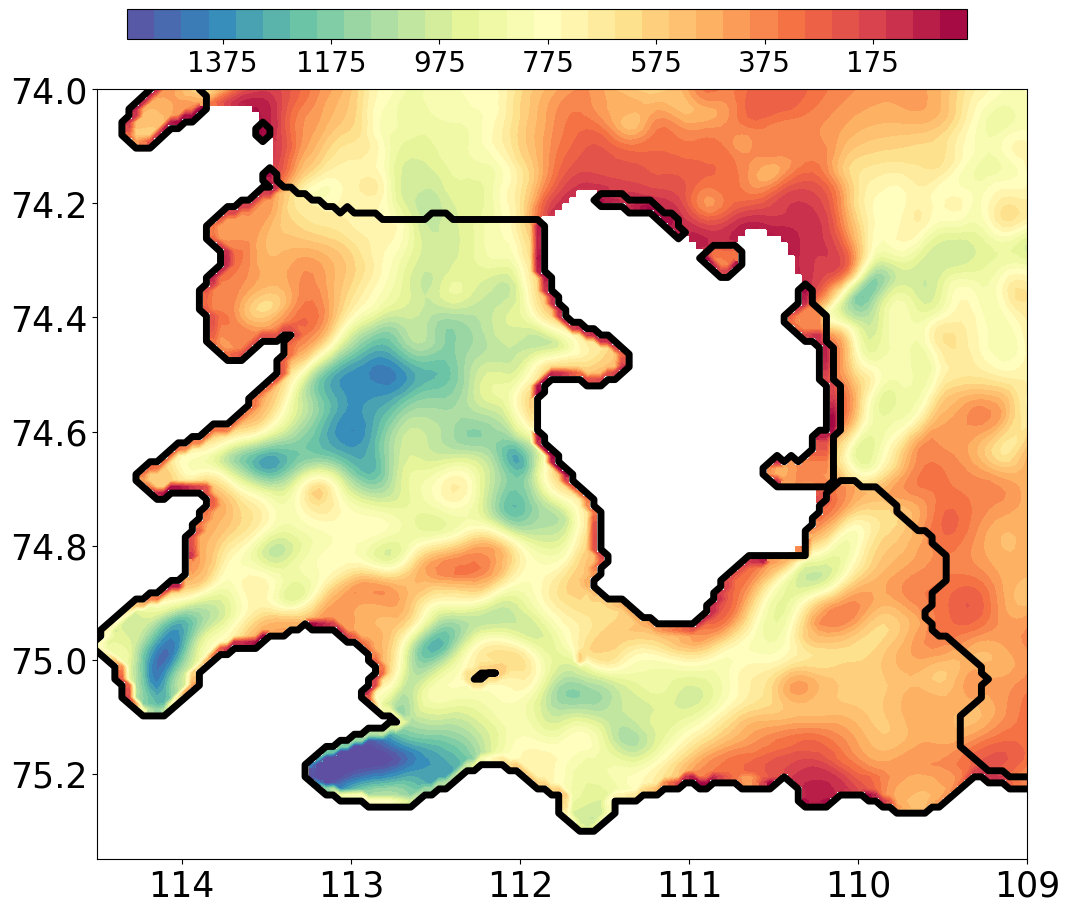

In [38]:
fig, ax = plt.subplots(figsize=(12,10))

ax.pcolormesh(XC, YC, bath, vmin=-1551, vmax=0, cmap='Spectral_r')
im = ax.contourf(XC, YC, bath, levels=np.arange(-1551, 1, 50), cmap='Spectral_r')
#plt.colorbar(im)

ax.contour(XC, YC, icemask, levels=[0,1], colors=['k'], linewidths=5)

ax.set_xlim(-114.5, -109)
ax.set_ylim(-75.35, -74)

ax.set_xticks([-114, -113, -112, -111, -110, -109])
ax.set_xticklabels([114, 113, 112, 111, 110, 109])
        
ax.set_yticks([-75.2, -75, -74.8, -74.6, -74.4, -74.2,  -74])
ax.set_yticklabels([75.2, "75.0",  74.8, 74.6, 74.4, 74.2, "74.0"])
        
ax.tick_params(axis='both', labelsize=25)

cbar_ax = fig.add_axes([0.15, 0.93, 0.7, 0.03])
cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal', extend='both')

cbar.set_ticks(np.arange(-1375, 1, 200))
cbar.set_ticklabels(np.arange(1375, 1, -200))
cbar.ax.tick_params(labelsize=20)

plt.savefig('img_misc/Smith_Kohler_overviewImg.png', dpi=300)

### Bathymetry - Thwaites Center

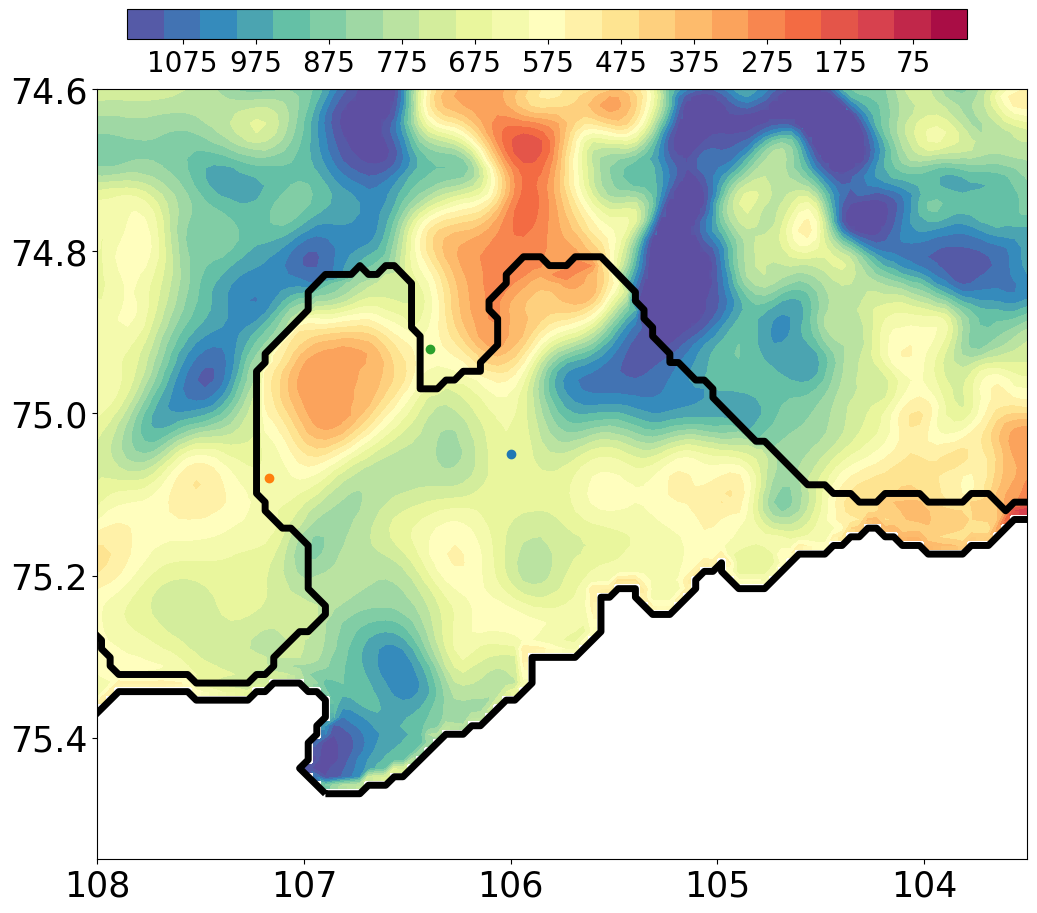

In [150]:
fig, ax = plt.subplots(figsize=(12,10))

ax.pcolormesh(XC, YC, bath, vmin=-1151, vmax=0, cmap='Spectral_r')
im = ax.contourf(XC, YC, bath, levels=np.arange(-1151, 1, 50), cmap='Spectral_r')
#plt.colorbar(im)

ax.contour(XC, YC, icemask, levels=[0,1], colors=['k'], linewidths=5)

ax.set_xlim(-108, -103.5)
ax.set_ylim(-75.55, -74.6)

ax.set_xticks([-108, -107, -106, -105, -104])
ax.set_xticklabels([108, 107, 106, 105, 104])
        
ax.set_yticks([-75.4, -75.2, -75, -74.8, -74.6])
ax.set_yticklabels([75.4, 75.2, "75.0", 74.8, 74.6])
        
ax.tick_params(axis='both', labelsize=25)

cbar_ax = fig.add_axes([0.15, 0.93, 0.7, 0.03])
cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal', extend='both')

cbar.set_ticks(np.arange(-1075, 1, 100))
cbar.set_ticklabels(np.arange(1075, 1, -100))
cbar.ax.tick_params(labelsize=20)

ax.scatter(-106, -75.05)
ax.scatter(-107.17, -75.08)
ax.scatter(-106.39, -74.92)

# plt.savefig('img_misc/Thwaites_overviewImg.png', dpi=300)

In [136]:
lonlat = (-106, -75.05)

ix = np.argmin(abs(lonlat[0] - XC))
iy = np.argmin(abs(lonlat[1] - YC))
print(bath[iy, ix]) ## Center ice shelf

-661.77978515625


In [146]:
lonlat = (-107.17, -75.08)

ix = np.argmin(abs(lonlat[0] - XC))
iy = np.argmin(abs(lonlat[1] - YC))
print(bath[iy, ix]) ## NW

-639.0599975585938


In [147]:
-661.77978515625 - -639.0599975585938

-22.71978759765625

In [151]:
lonlat = (-106.39, -74.92)

ix = np.argmin(abs(lonlat[0] - XC))
iy = np.argmin(abs(lonlat[1] - YC))
print(bath[iy, ix]) ## N

-583.0034790039062


In [152]:
-661.77978515625 - -583.0034790039062

-78.77630615234375

### Pine Island

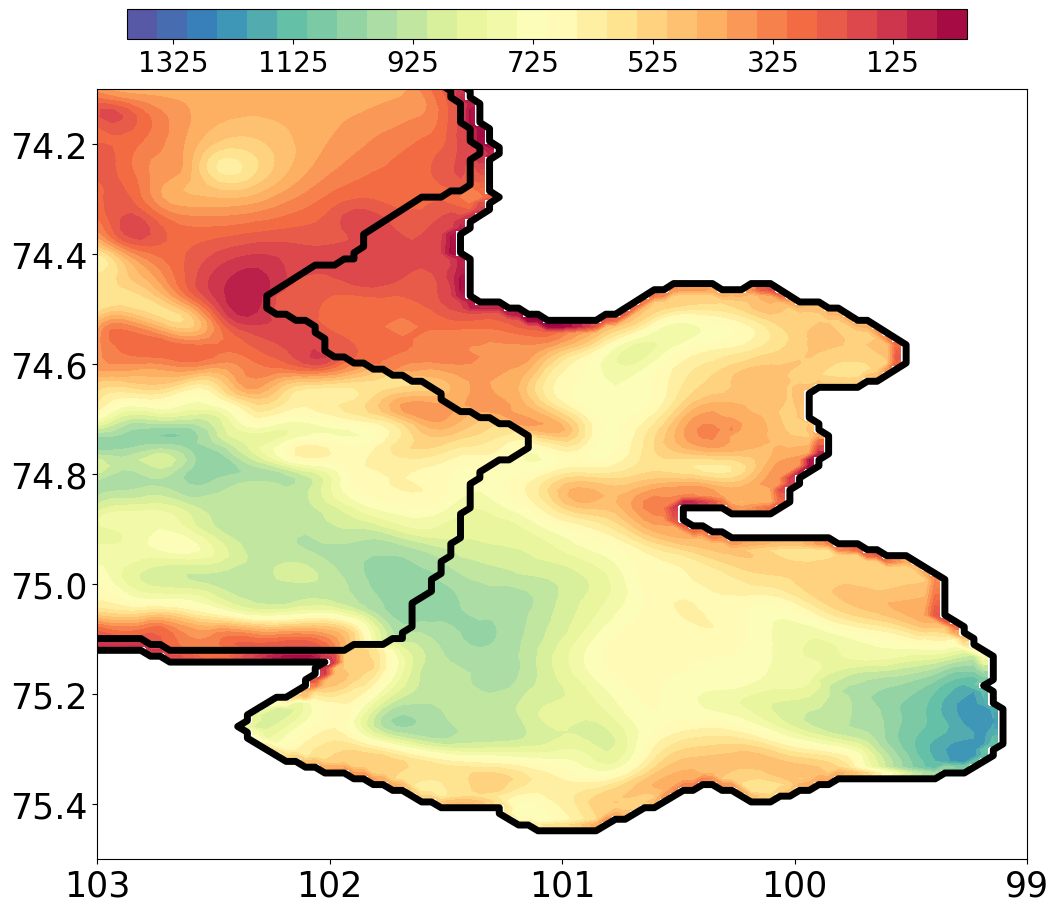

In [107]:
fig, ax = plt.subplots(figsize=(12,10))

ax.pcolormesh(XC, YC, bath, vmin=-1401, vmax=0, cmap='Spectral_r')
im = ax.contourf(XC, YC, bath, levels=np.arange(-1401, 1, 50), cmap='Spectral_r')
#plt.colorbar(im)

ax.contour(XC, YC, icemask, levels=[0,1], colors=['k'], linewidths=5)

ax.set_xlim(-103, -99)
ax.set_ylim(-75.5, -74.1)

ax.set_xticks([-103, -102, -101, -100, -99])
ax.set_xticklabels([103,102, 101, 100, 99])
        
ax.set_yticks([-75.4, -75.2, -75, -74.8, -74.6, -74.4, -74.2])
ax.set_yticklabels([75.4, 75.2, "75.0", 74.8, 74.6, 74.4, 74.2])
        
ax.tick_params(axis='both', labelsize=25)

cbar_ax = fig.add_axes([0.15, 0.93, 0.7, 0.03])
cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal', extend='both')

cbar.set_ticks(np.arange(-1325, 1, 200))
cbar.set_ticklabels(np.arange(1325, 1, -200))
cbar.ax.tick_params(labelsize=20)

plt.savefig('img_misc/PineIsland_overviewImg.png', dpi=300)

In [95]:
np.argmin(abs(XC - -100.6))

946

In [96]:
np.argmin(abs(YC - -75.24))

25

In [97]:
bath[25, 946]

-706.0

### Fastest Path to Thwaites

In [4]:
### Load data for plotting purposes
YG = np.load('inputs/ref/YG.npy')
XG = np.load('inputs/ref/XG.npy')
YC = np.load('inputs/ref/YC.npy')
XC = np.load('inputs/ref/XC.npy')
RF = np.load('inputs/ref/RF.npy')

IMF = nc.Dataset('/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/2D/2D_2005_09C.nc')
y1 = np.argmin(abs(IMF['YG'] - YG[0]))
y2 = np.argmin(abs(IMF['YG'] - YG[-1]))
x1 = np.argmin(abs(IMF['XG'] - XG[0]%360))
x2 = np.argmin(abs(IMF['XG'] - XG[-1]%360))

icedraft = h5py.File('/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/meta/ICEDRAFT_v8.mat')
icedraft = icedraft['Ice_Map'][y1:y2+1,x1:x2+1]

grid = h5py.File('/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/meta/GRID_v8.mat')
bath = -grid['Depth'][:]
bath = bath[y1:y2+1,x1:x2+1] + icedraft
bath[bath==0] = np.nan
bath[bath<-2000] = np.nan

mask = np.load('inputs/ref/TIS_Mask.npy')
mask2 = np.load('inputs/ref/PIG_Mask.npy')

In [5]:
data = zarr.open('outputs/R8_ASE_5min/thwaites.zarr', 'r')
IS = np.load('processed_dataGL/thwaites_0d_IS.npy')

In [6]:
lats = np.asarray(data['lat'][:])
lons = np.asarray(data['lon'][:])

In [7]:
dt_to_icefront = []
dt_to_GL = []
Nakayama_2019_lat = -74.24

for p in tqdm(range(lats.shape[0])):
    added = False
    for t in range(lats.shape[1]-4):
        if lats[p, t] > Nakayama_2019_lat:
            dt_to_icefront.append(t - IS[p])
            dt_to_GL.append(t)
            added = True
            break
    
    if not added:
        dt_to_icefront.append(np.nan)
        dt_to_GL.append(np.nan)
        
dt_to_icefront = np.asarray(dt_to_icefront)
dt_to_GL = np.asarray(dt_to_GL)

100%|█████████████████████████████████████████████████| 389790/389790 [00:30<00:00, 12775.82it/s]


In [8]:
np.nanpercentile(dt_to_GL, 0.1)

48.0

In [9]:
subY = lats[dt_to_GL <= 48]
subX = lons[dt_to_GL <= 48]
subY.shape

(427, 1096)

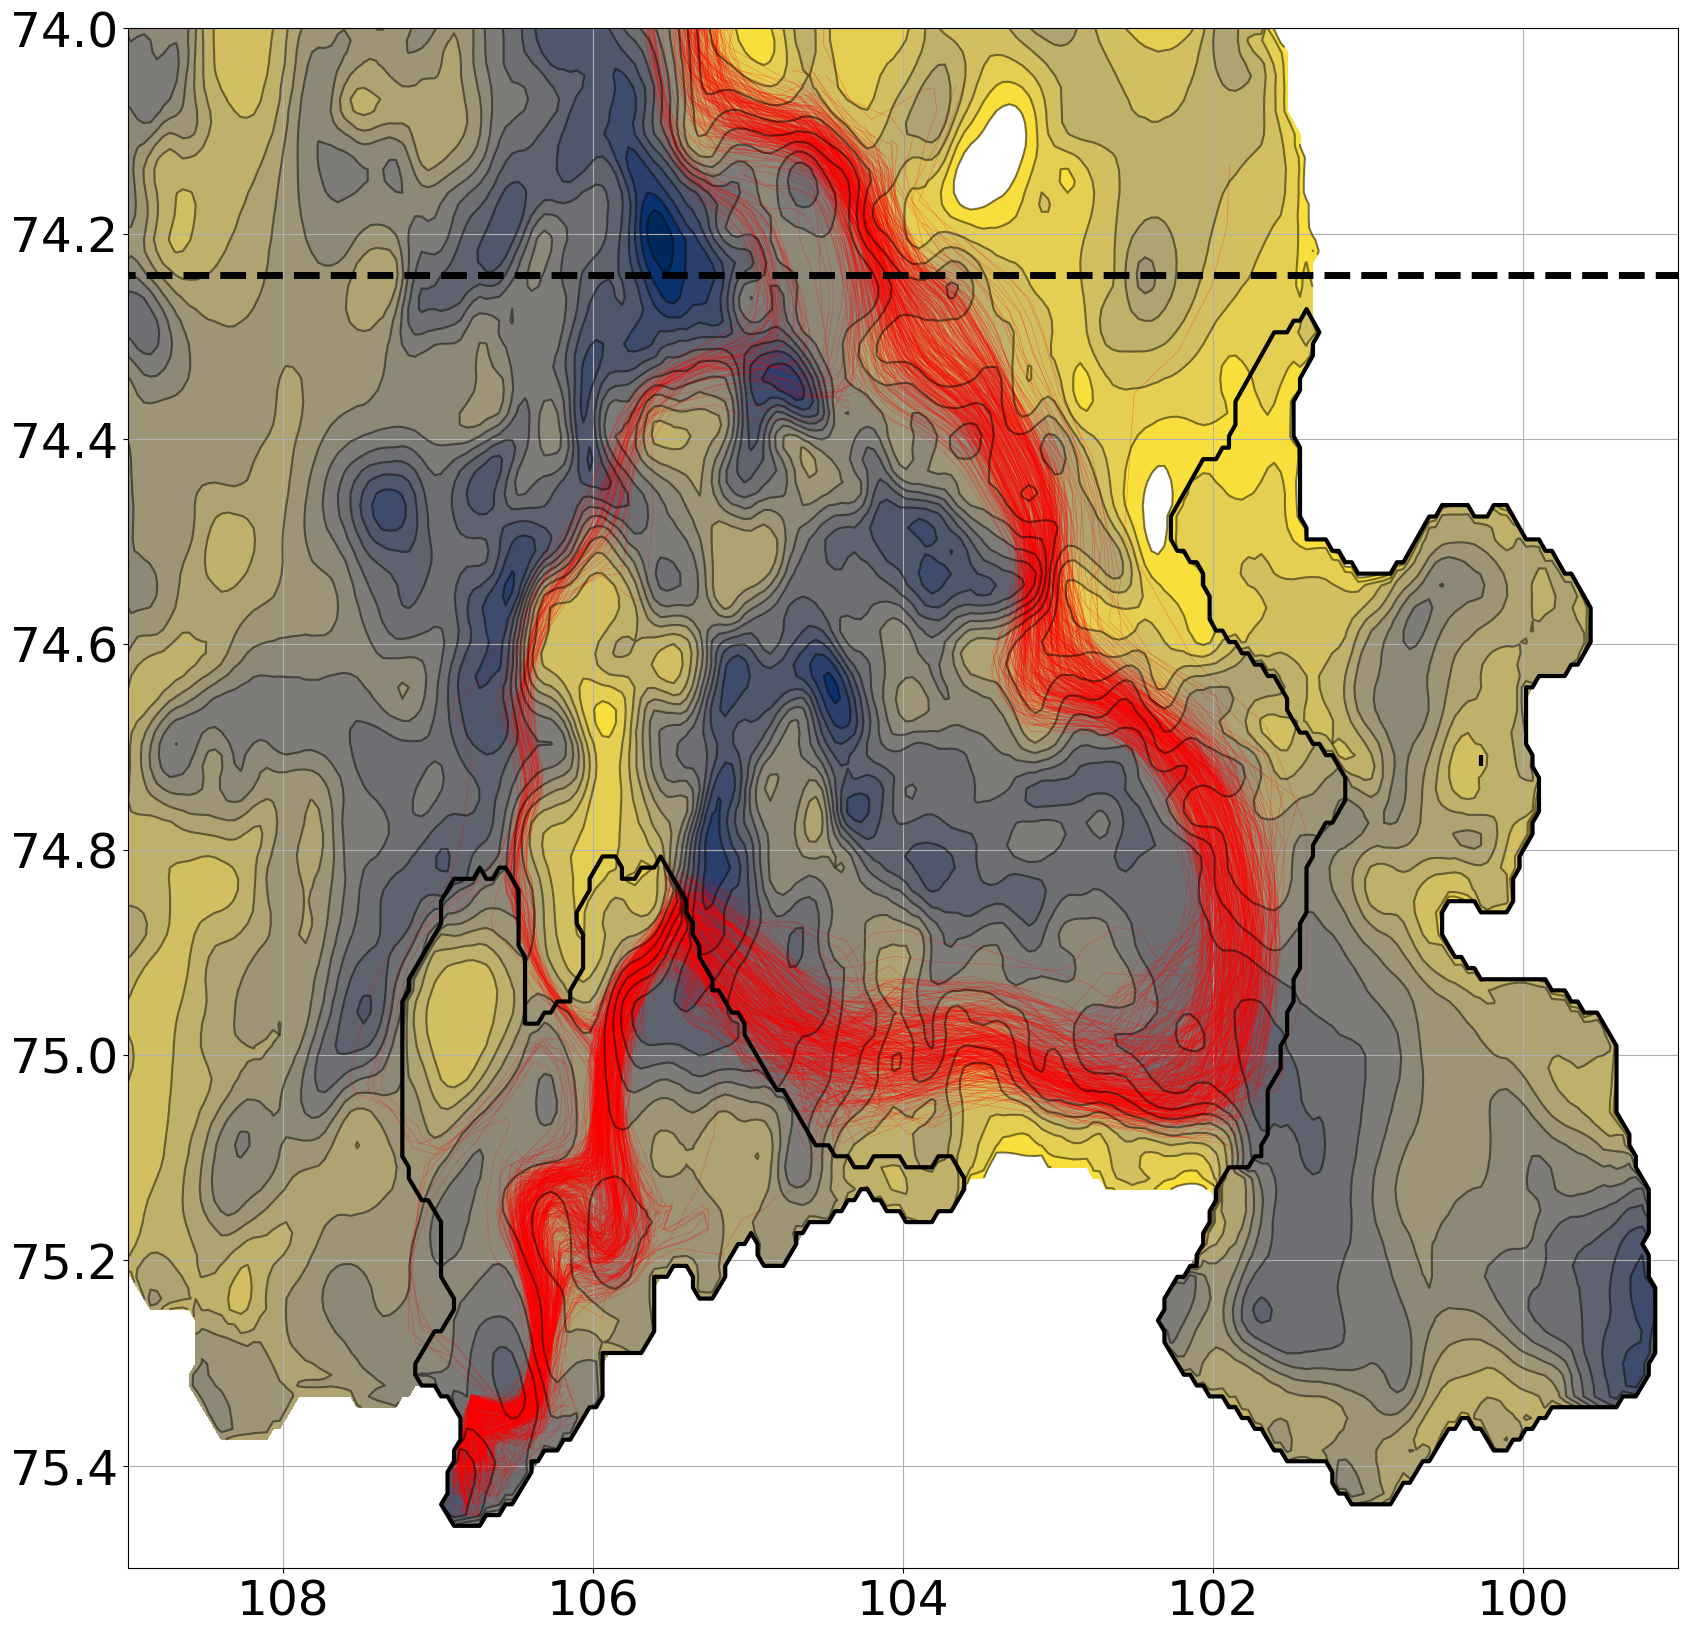

In [10]:
fig, ax = plt.subplots(figsize=(20,20))

for i in range(len(subY)):
    ax.plot(subX[i][:50], subY[i][:50], c= 'red', alpha=0.5, lw=0.3)
    
ax.contourf(XC, YC, bath, levels=np.arange(-1600, 0, 100), cmap='cividis')
ax.contour(XC, YC, bath, levels=np.arange(-1600, 0, 100), colors=['k'], linestyles='solid', alpha=0.5, zorder=3)
ax.contour(XC, YC, mask, levels=[0,1], colors=['k'], linewidths=3)
ax.contour(XC, YC, mask2, levels=[0,1], colors=['k'], linewidths=3)


ax.plot([-110, -99], [Nakayama_2019_lat,Nakayama_2019_lat], '--k', lw=5)

ax.set_xlim(-109, -99)
ax.set_ylim(-75.5, -74)

ax.tick_params(axis='both', labelsize=35)
ax.set_xticks([-108, -106, -104, -102, -100])
ax.set_xticklabels([108, 106, 104, 102, 100])

ax.set_yticks([-75.4, -75.2, -75, -74.8, -74.6, -74.4, -74.2, -74])
ax.set_yticklabels([75.4, 75.2, "75.0", 74.8, 74.6, 74.4, 74.2, "74.0"])

ax.grid()


plt.savefig('img_misc/Thwaites_Fastest_0.1Percent.png', dpi=300)

/tmp/ipykernel_2669130/2330631780.py:7: UserWarning: The following kwargs were not used by contour: 'lw'
  ax.contour(XC, YC, bath, levels=np.arange(-1600, 0, 100), colors=['k'], linestyles='solid',


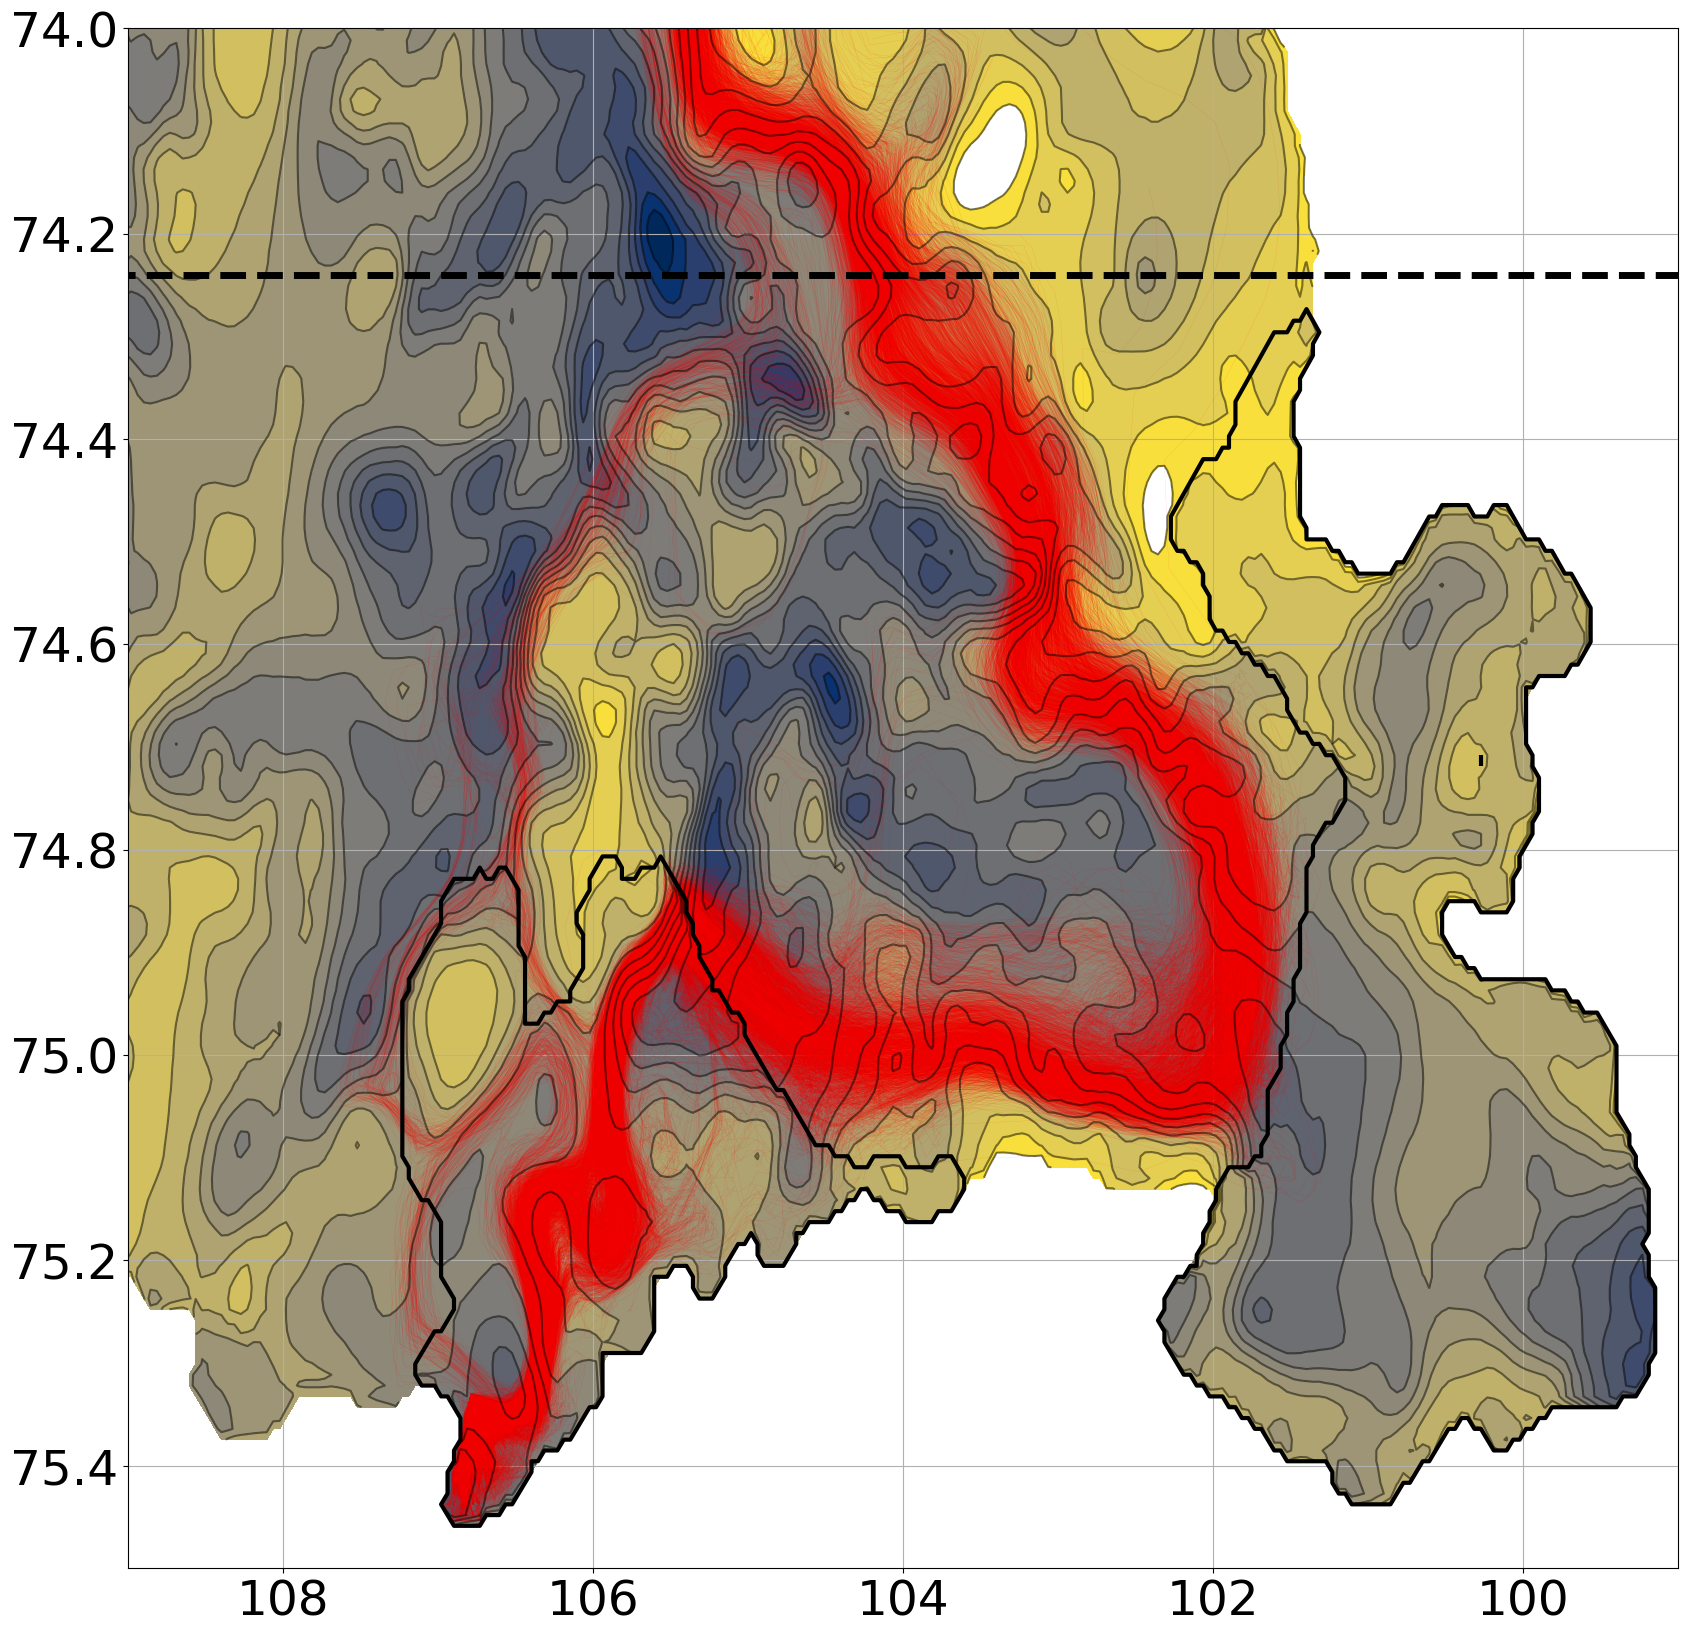

In [14]:
fig, ax = plt.subplots(figsize=(20,20))

for i in range(len(subY)):
    ax.plot(subX[i][:65], subY[i][:65], c= 'red', alpha=0.2, lw=0.2)
    
ax.contourf(XC, YC, bath, levels=np.arange(-1600, 0, 100), cmap='cividis')
ax.contour(XC, YC, bath, levels=np.arange(-1600, 0, 100), colors=['k'], linestyles='solid', 
           alpha=0.5, lw=0.1, zorder=3)
ax.contour(XC, YC, mask, levels=[0,1], colors=['k'], linewidths=3)
ax.contour(XC, YC, mask2, levels=[0,1], colors=['k'], linewidths=3)


ax.plot([-110, -99], [Nakayama_2019_lat,Nakayama_2019_lat], '--k', lw=5)

ax.set_xlim(-109, -99)
ax.set_ylim(-75.5, -74)

ax.tick_params(axis='both', labelsize=35)
ax.set_xticks([-108, -106, -104, -102, -100])
ax.set_xticklabels([108, 106, 104, 102, 100])

ax.set_yticks([-75.4, -75.2, -75, -74.8, -74.6, -74.4, -74.2, -74])
ax.set_yticklabels([75.4, 75.2, "75.0", 74.8, 74.6, 74.4, 74.2, "74.0"])

ax.grid()


plt.savefig('img_misc/Thwaites_Fastest_1Percent.png', dpi=300)